In [6]:
from spellbook import data_processing
import polars as pl
import matplotlib.pyplot as plt
import datetime
import numpy as np
from bloxs import B
from matplotlib import font_manager

## Upload Data & Quick Lookup

In [43]:
schemas = {
    'timestamp': pl.Datetime,
}

post_df = pl.read_csv('example/posts.csv', schema_overrides=schemas)
comment_df = pl.read_csv('example/comments.csv', schema_overrides=schemas)

In [8]:
post_df.head()

shape: (5, 5)
┌───────────────────────┬──────────────┬───────────────────────┬───────────┬───────────────────────┐
│ source_id             ┆ timestamp    ┆ text                  ┆ n_comment ┆ url                   │
│ ---                   ┆ ---          ┆ ---                   ┆ ---       ┆ ---                   │
│ str                   ┆ datetime[μs] ┆ str                   ┆ i64       ┆ str                   │
╞═══════════════════════╪══════════════╪═══════════════════════╪═══════════╪═══════════════════════╡
│ post_09714d8184611df6 ┆ 2025-02-17   ┆ อย่ารอช้า เพราะถ้ามีคอยน์  ┆ 0         ┆ https://www.facebook. │
│ 78e09816c…            ┆ 14:00:00     ┆ ไม่ต…                  ┆           ┆ com/krung…            │
│ post_710036a16bc3b74b ┆ 2025-02-17   ┆ จะร้านเล็ก หรือร้านใหญ่    ┆ 59        ┆ https://www.facebook. │
│ b44d56733…            ┆ 12:17:00     ┆ พกบัตร…                ┆           ┆ com/krung…            │
│ post_6607df5cab3018ee ┆ 2025-02-16   ┆ งวดประจำวันที่ 16 ก.พ.   ┆ 141       ┆ https://www.facebook. │
│ 0fcc071e0…            ┆ 16:02:00     ┆ 68                    ┆           ┆ com/krung…            │
│                       ┆              ┆ รางว…                 ┆           ┆                       │
│ post_a25a94d5802f115b ┆ 2025-02-15   ┆ พ่อค้าแม่ค้าออนไลน์        ┆ 5         ┆ https://www.facebook. │
│ cfb55ad11…            ┆ 17:00:00     ┆ ไม่มีบัตรเ…              ┆           ┆ com/krung…            │
│ post_5b4554666bdaa7cb ┆ 2025-02-15   ┆ ช้อปเพลิน เปย์สบาย       ┆ 6         ┆ https://www.facebook. │
│ bdae6007c…            ┆ 12:00:00     ┆ คุ้มทุกวัน!…              ┆           ┆ com/krung…            │
└───────────────────────┴──────────────┴───────────────────────┴───────────┴───────────────────────┘

In [9]:
comment_df.head()

shape: (5, 5)
┌─────────────────────┬─────────────────┬──────────────┬─────────────────────┬─────────────────────┐
│ source_id           ┆ comment_id      ┆ timestamp    ┆ text                ┆ url                 │
│ ---                 ┆ ---             ┆ ---          ┆ ---                 ┆ ---                 │
│ str                 ┆ i64             ┆ datetime[μs] ┆ str                 ┆ str                 │
╞═════════════════════╪═════════════════╪══════════════╪═════════════════════╪═════════════════════╡
│ post_6607df5cab3018 ┆ 912031294146056 ┆ 2025-02-16   ┆ ต้องไปซื้อที่ร้านค้าใช่ไหมค ┆ https://www.faceboo │
│ ee0fcc071e0…        ┆                 ┆ 19:27:00     ┆ ะ                   ┆ k.com/krung…        │
│ 912031294146056     ┆ 509160065152675 ┆ 2025-02-16   ┆ สวัสดีค่ะ คุณธัญธร ผ้าไทย ┆ https://www.faceboo │
│                     ┆                 ┆ 19:30:00     ┆ หากต…               ┆ k.com/krung…        │
│ post_6607df5cab3018 ┆ 652113483940333 ┆ 2025-02-17   ┆ N3 ขายออนไลน์ในกระเป๋ ┆ https://www.faceboo │
│ ee0fcc071e0…        ┆                 ┆ 09:28:00     ┆ าตังค์โดย…            ┆ k.com/krung…        │
│ 652113483940333     ┆ 614493521335283 ┆ 2025-02-17   ┆ สวัสดีค่ะ คุณ Sompob    ┆ https://www.faceboo │
│                     ┆                 ┆ 09:39:00     ┆ Srisuwan            ┆ k.com/krung…        │
│                     ┆                 ┆              ┆ …                   ┆                     │
│ post_6607df5cab3018 ┆ 691489153204603 ┆ 2025-02-16   ┆ รางวัลพิเศษคืออะไรซื้อยัง ┆ https://www.faceboo │
│ ee0fcc071e0…        ┆                 ┆ 16:47:00     ┆ ไงล่ะ…               ┆ k.com/krung…        │
└─────────────────────┴─────────────────┴──────────────┴─────────────────────┴─────────────────────┘

In [10]:
post_df.null_count()

shape: (1, 5)
┌───────────┬───────────┬──────┬───────────┬─────┐
│ source_id ┆ timestamp ┆ text ┆ n_comment ┆ url │
│ ---       ┆ ---       ┆ ---  ┆ ---       ┆ --- │
│ u32       ┆ u32       ┆ u32  ┆ u32       ┆ u32 │
╞═══════════╪═══════════╪══════╪═══════════╪═════╡
│ 0         ┆ 3         ┆ 0    ┆ 0         ┆ 0   │
└───────────┴───────────┴──────┴───────────┴─────┘

In [11]:
comment_df.null_count()

shape: (1, 5)
┌───────────┬────────────┬───────────┬──────┬─────┐
│ source_id ┆ comment_id ┆ timestamp ┆ text ┆ url │
│ ---       ┆ ---        ┆ ---       ┆ ---  ┆ --- │
│ u32       ┆ u32        ┆ u32       ┆ u32  ┆ u32 │
╞═══════════╪════════════╪═══════════╪══════╪═════╡
│ 0         ┆ 0          ┆ 0         ┆ 0    ┆ 0   │
└───────────┴────────────┴───────────┴──────┴─────┘

In [12]:
#post_df.write_excel('posts_excel.xlsx')
#comment_df.write_excel('comments_excel.xlsx')

## Preprocessing

In [13]:
# Add additional column in comment data
comment_df = comment_df.with_columns(
    pl.when(pl.col('source_id').str.contains('post')).then(pl.lit('post')).otherwise(pl.lit('comment')).alias('source_type')
)

In [14]:
comment_df.head()

shape: (5, 6)
┌────────────────┬────────────────┬────────────────┬────────────────┬────────────────┬─────────────┐
│ source_id      ┆ comment_id     ┆ timestamp      ┆ text           ┆ url            ┆ source_type │
│ ---            ┆ ---            ┆ ---            ┆ ---            ┆ ---            ┆ ---         │
│ str            ┆ i64            ┆ datetime[μs]   ┆ str            ┆ str            ┆ str         │
╞════════════════╪════════════════╪════════════════╪════════════════╪════════════════╪═════════════╡
│ post_6607df5ca ┆ 91203129414605 ┆ 2025-02-16     ┆ ต้องไปซื้อที่ร้านค้าใ ┆ https://www.fa ┆ post        │
│ b3018ee0fcc071 ┆ 6              ┆ 19:27:00       ┆ ช่ไหมคะ         ┆ cebook.com/kru ┆             │
│ e0…            ┆                ┆                ┆                ┆ ng…            ┆             │
│ 91203129414605 ┆ 50916006515267 ┆ 2025-02-16     ┆ สวัสดีค่ะ คุณธัญธร  ┆ https://www.fa ┆ comment     │
│ 6              ┆ 5              ┆ 19:30:00       ┆ ผ้าไทย          ┆ cebook.com/kru ┆             │
│                ┆                ┆                ┆ หากต…          ┆ ng…            ┆             │
│ post_6607df5ca ┆ 65211348394033 ┆ 2025-02-17     ┆ N3 ขายออนไลน์ใน ┆ https://www.fa ┆ post        │
│ b3018ee0fcc071 ┆ 3              ┆ 09:28:00       ┆ กระเป๋าตังค์โดย…  ┆ cebook.com/kru ┆             │
│ e0…            ┆                ┆                ┆                ┆ ng…            ┆             │
│ 65211348394033 ┆ 61449352133528 ┆ 2025-02-17     ┆ สวัสดีค่ะ คุณ      ┆ https://www.fa ┆ comment     │
│ 3              ┆ 3              ┆ 09:39:00       ┆ Sompob         ┆ cebook.com/kru ┆             │
│                ┆                ┆                ┆ Srisuwan       ┆ ng…            ┆             │
│                ┆                ┆                ┆ …              ┆                ┆             │
│ post_6607df5ca ┆ 69148915320460 ┆ 2025-02-16     ┆ รางวัลพิเศษคืออะไ ┆ https://www.fa ┆ post        │
│ b3018ee0fcc071 ┆ 3              ┆ 16:47:00       ┆ รซื้อยังไงล่ะ…     ┆ cebook.com/kru ┆             │
│ e0…            ┆                ┆                ┆                ┆ ng…            ┆             │
└────────────────┴────────────────┴────────────────┴────────────────┴────────────────┴─────────────┘

## Plot Functions

In [15]:
def plot_line_chart(x: list, y: list, figsize=(10, 6)):
    """
    Plots a smooth line chart with markers colored based on y values and a grey line.
    Displays y values as text labels if y >= 1000.

    Parameters:
    x (list): List of values for the x-axis (e.g., timestamps).
    y (list): List of values for the y-axis (e.g., number of comments).
    """
    # Create the plot
    plt.figure(figsize=figsize)
    plt.plot(x, y, linestyle='-', color='grey')  # Grey line

    # Normalize y values for colormap
    y_norm = (np.array(y) - min(y)) / (max(y) - min(y) + 1e-6)  # Avoid division by zero
    cmap = plt.get_cmap('Oranges')  # Choose a colormap

    # Plot markers with colors based on y values
    for i in range(len(x)):
        plt.scatter(x[i], y[i], color=cmap(y_norm[i]), edgecolors='grey', s=20, zorder=3)
        
        # Show number if y >= 1000
        if y[i] >= 1500:
            plt.text(x[i], y[i] + 400, f"{y[i]:,}", fontsize=9, ha='center', color='black')
            plt.text(x[i], y[i] + 150, f"{x[i]}", fontsize=6, ha='center', color='black')

    # Add labels and title
    plt.xlabel('Timestamp')
    plt.ylabel('Number of Comment')
    plt.title('Number of Comments Over Time', y=1.05)

    # Add grid lines
    plt.grid(color='darkgrey', alpha=0.3, linestyle='--')

    # Hide the top and right plot borders
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Format the x-axis if the data is datetime-like
    if isinstance(x[0], datetime.datetime):  # Check if x contains datetime objects
        plt.gcf().autofmt_xdate()  # Auto-format dates for better readability
        
        # More frequent ticks
        plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=30))  # You can adjust nbins for more or fewer ticks
        plt.xticks(rotation=45, fontsize=8)  # Smaller font size and rotation for better legibility
    else:
        # Adjust for non-datetime x-axis
        plt.xticks(rotation=45, fontsize=8)

    # Display the plot
    plt.show()

In [16]:
post_df.schema

Schema([('source_id', String),
        ('timestamp', Datetime(time_unit='us', time_zone=None)),
        ('text', String),
        ('n_comment', Int64),
        ('url', String)])

In [17]:
comment_df.schema

Schema([('source_id', String),
        ('comment_id', Int64),
        ('timestamp', Datetime(time_unit='us', time_zone=None)),
        ('text', String),
        ('url', String),
        ('source_type', String)])

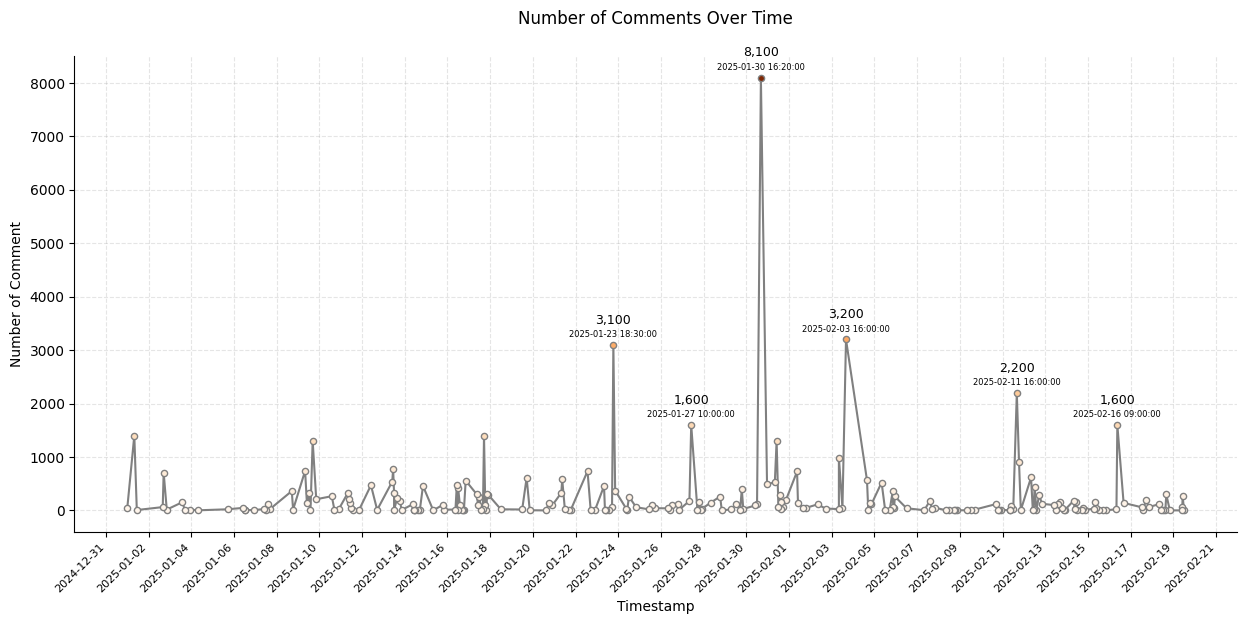

In [18]:
df_plot = post_df.filter(pl.col('timestamp') >= datetime.datetime(2025, 1, 1)).sort('timestamp', descending=True)

plot_line_chart(x=df_plot.get_column('timestamp'),
                y=df_plot.get_column('n_comment'),
                figsize=(15, 7))

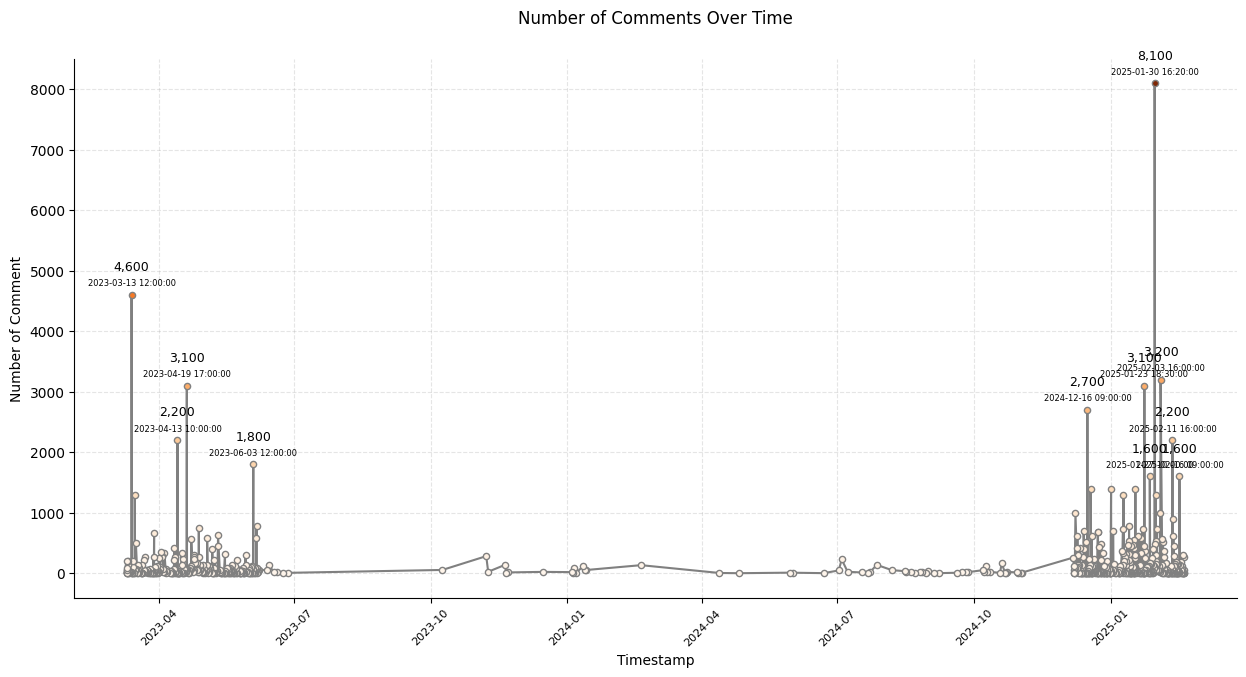

In [19]:
df_plot = post_df.sort('timestamp', descending=True)

plot_line_chart(x=df_plot.get_column('timestamp'),
                y=df_plot.get_column('n_comment'),
                figsize=(15, 7))

In [20]:
from spellbook.visualization import wordcloud

[nltk_data] Downloading package punkt to /Users/pa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/pa/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/pa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#sample_sentence = 'วันนี้ฉันไปเที่ยวที่สวนสาธารณะกับเพื่อนๆ และเราต่างก็รู้สึกว่า "the weather was absolutely perfect for a picnic" เพราะอากาศไม่ร้อนไม่หนาวเกินไป เรานั่งเล่นอยู่ใต้ต้นไม้ใหญ่ พูดคุยกันเรื่องงานและชีวิตส่วนตัว บางครั้งก็มีเสียงหัวเราะดังลั่นเพราะมีคนเล่าเรื่องตลกๆ อย่าง "remember that time when we got lost in the mall and ended up finding the best ice cream shop?" หลังจากนั้นเราก็เดินเล่นไปรอบๆ สวน เจอเด็กๆ กำลังเล่นฟุตบอลและมีคนกำลังออกกำลังกายกันอย่างขยันขันแข็ง จนกระทั่งพระอาทิตย์เริ่มตก เราจึงตัดสินใจกลับบ้าน พร้อมกับความรู้สึกว่า "this was such a refreshing day, we should do this again soon!"'

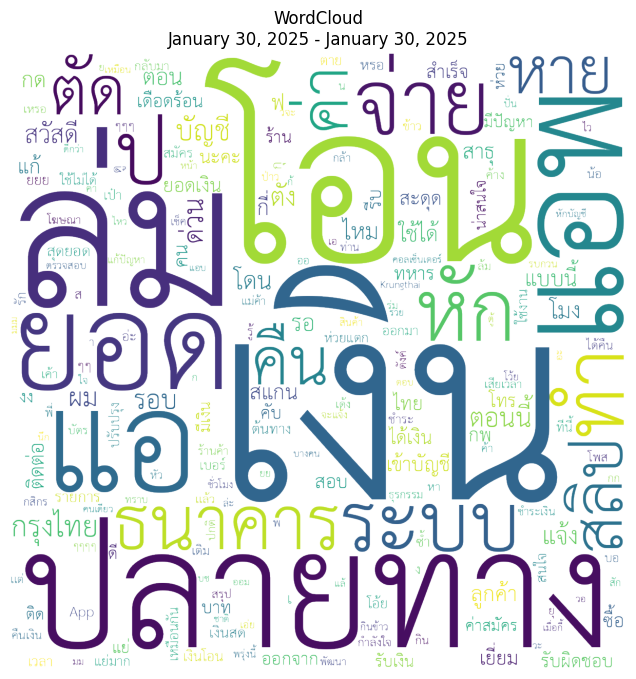

In [22]:
from_date = datetime.datetime(2025, 1, 30)
within_date = datetime.datetime(2025, 1, 31)

title = f'WordCloud\n{from_date.strftime('%B %d, %Y')} - {(within_date - datetime.timedelta(days=1)).strftime('%B %d, %Y')}'

sentences = comment_df.filter((pl.col('source_type') == ('post')) & (pl.col('timestamp') >= from_date) & (pl.col('timestamp') < within_date)).get_column('text')
combined_sentence = ' '.join(sentences)

wordcloud.plot_wordcloud(combined_sentence, font_path='fonts/THSarabunNew.ttf', language='th', colormap='viridis', keep_stopwords=False, figsize=(8, 8), width=1200, height=1200, title=title, save_path=f'{title}.png', background_color='rgba(255, 255, 255, 0)')

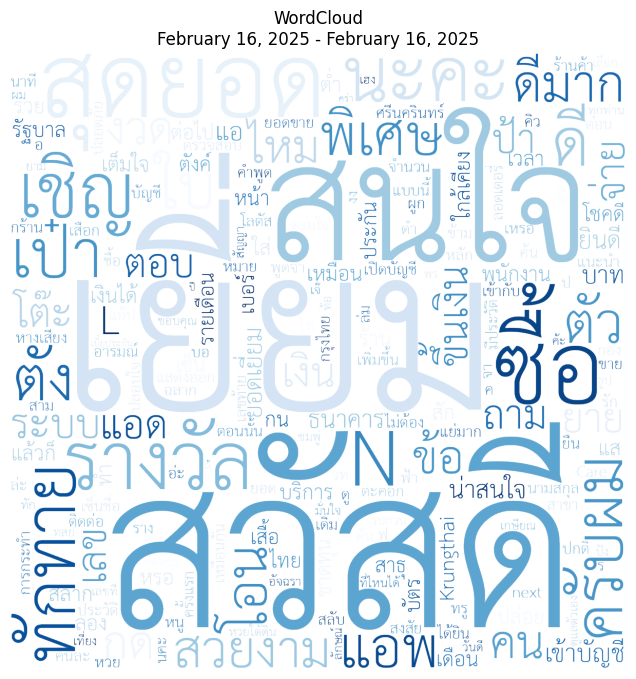

In [23]:
from_date = datetime.datetime(2025, 2, 16)
within_date = datetime.datetime(2025, 2, 17)

title = f'WordCloud\n{from_date.strftime('%B %d, %Y')} - {(within_date - datetime.timedelta(days=1)).strftime('%B %d, %Y')}'

sentences = comment_df.filter((pl.col('source_type') == ('post')) & (pl.col('timestamp') >= from_date) & (pl.col('timestamp') < within_date)).get_column('text')
combined_sentence = ' '.join(sentences)

wordcloud.plot_wordcloud(combined_sentence, font_path='fonts/THSarabunNew.ttf', language='th', colormap='Blues', keep_stopwords=False, figsize=(8, 8), width=1200, height=1200, title=title, save_path=f'{title}.png', background_color='rgba(255, 255, 255, 0)')

In [24]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

('Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Grays',
 'Grays_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'berlin',
 'berlin_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'ci

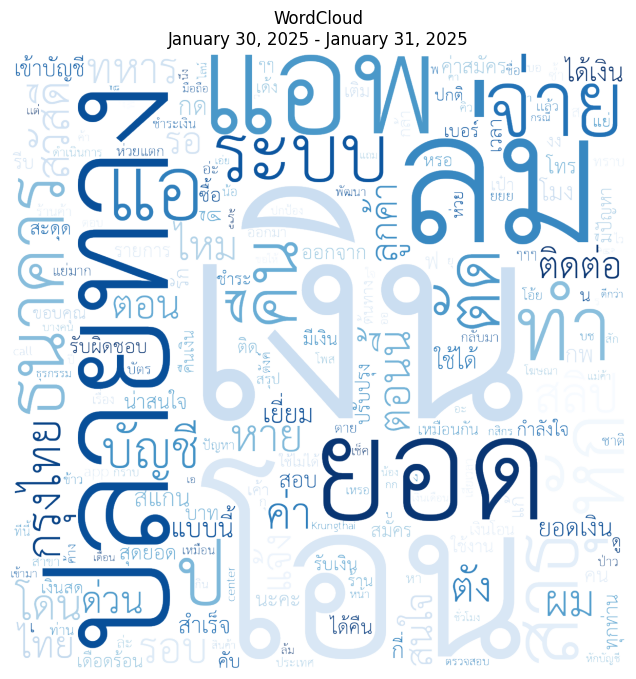

In [25]:
from_date = datetime.datetime(2025, 1, 30)
within_date = datetime.datetime(2025, 2, 1)

title = f'WordCloud\n{from_date.strftime('%B %d, %Y')} - {(within_date - datetime.timedelta(days=1)).strftime('%B %d, %Y')}'

sentences = comment_df.filter((pl.col('source_type') == ('post')) & (pl.col('timestamp') >= from_date) & (pl.col('timestamp') < within_date)).get_column('text')
combined_sentence = ' '.join(sentences)

wordcloud.plot_wordcloud(combined_sentence, font_path='fonts/THSarabunNew.ttf', language='th', colormap='Blues', keep_stopwords=False, figsize=(8, 8), width=1200, height=1200, title=title, save_path=f'{title}.png', background_color='rgba(255, 255, 255, 0)')

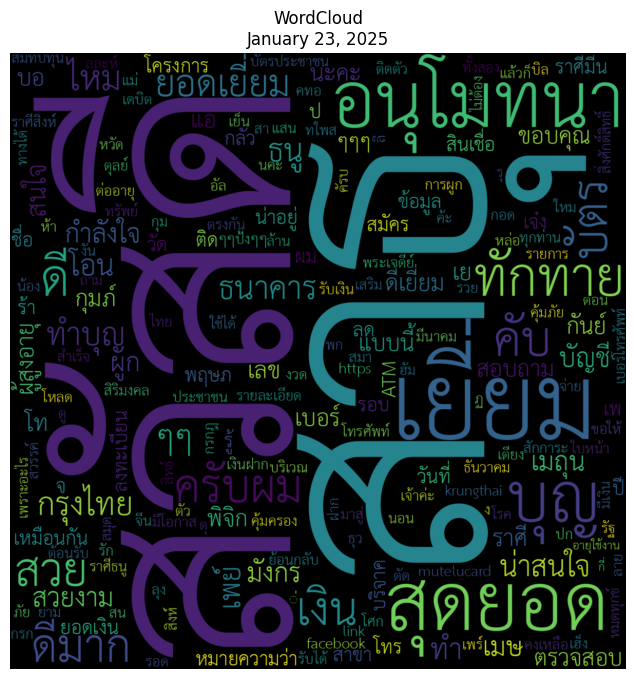

In [26]:
from_date = datetime.datetime(2025, 1, 23)
within_date = datetime.datetime(2025, 1, 24)

title = f'WordCloud\n{from_date.strftime('%B %d, %Y')}'

sentences = comment_df.filter((pl.col('source_type') == ('post')) & (pl.col('timestamp') >= from_date) & (pl.col('timestamp') < within_date)).get_column('text')
combined_sentence = ' '.join(sentences)

wordcloud.plot_wordcloud(combined_sentence, font_path='fonts/THSarabunNew.ttf', language='th', keep_stopwords=False, figsize=(8, 8), width=1200, height=1200, title=title)

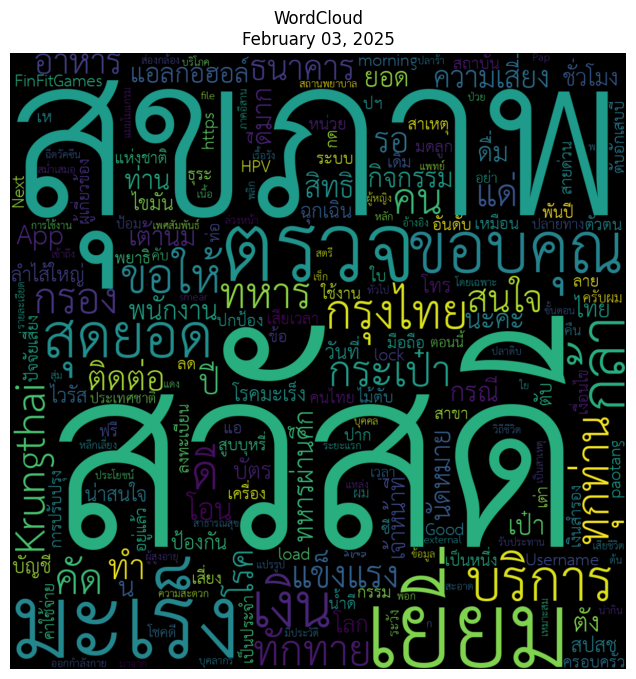

In [27]:
from_date = datetime.datetime(2025, 2, 3)
within_date = datetime.datetime(2025, 2, 4)

title = f'WordCloud\n{from_date.strftime('%B %d, %Y')}'

sentences = comment_df.filter((pl.col('source_type') == ('post')) & (pl.col('timestamp') >= from_date) & (pl.col('timestamp') < within_date)).get_column('text')
combined_sentence = ' '.join(sentences)

wordcloud.plot_wordcloud(combined_sentence, font_path='fonts/THSarabunNew.ttf', language='th', keep_stopwords=False, figsize=(8, 8), width=1200, height=1200, title=title)

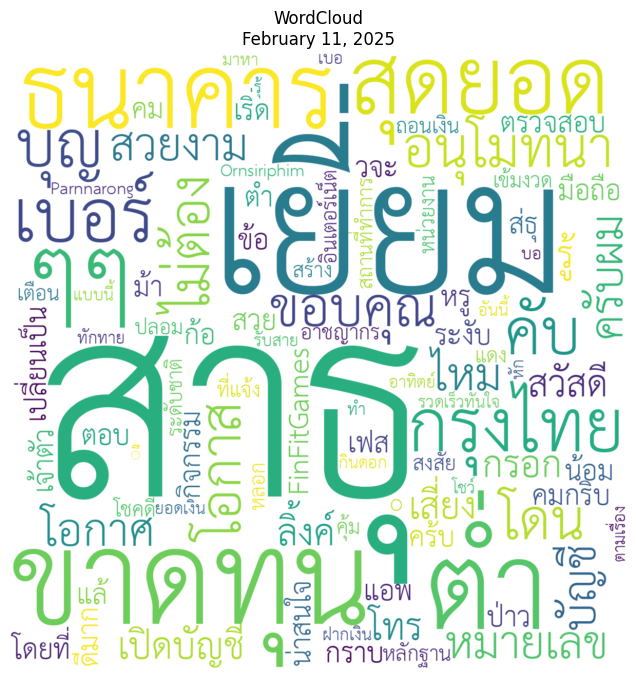

In [28]:
from_date = datetime.datetime(2025, 2, 11)
within_date = datetime.datetime(2025, 2, 12)

title = f'WordCloud\n{from_date.strftime('%B %d, %Y')}'

sentences = comment_df.filter((pl.col('source_type') == ('post')) & (pl.col('timestamp') >= from_date) & (pl.col('timestamp') < within_date)).get_column('text')
combined_sentence = ' '.join(sentences)

wordcloud.plot_wordcloud(combined_sentence, background_color='white', font_path='fonts/THSarabunNew.ttf', language='th', keep_stopwords=False, figsize=(8, 8), width=1200, height=1200, title=title)

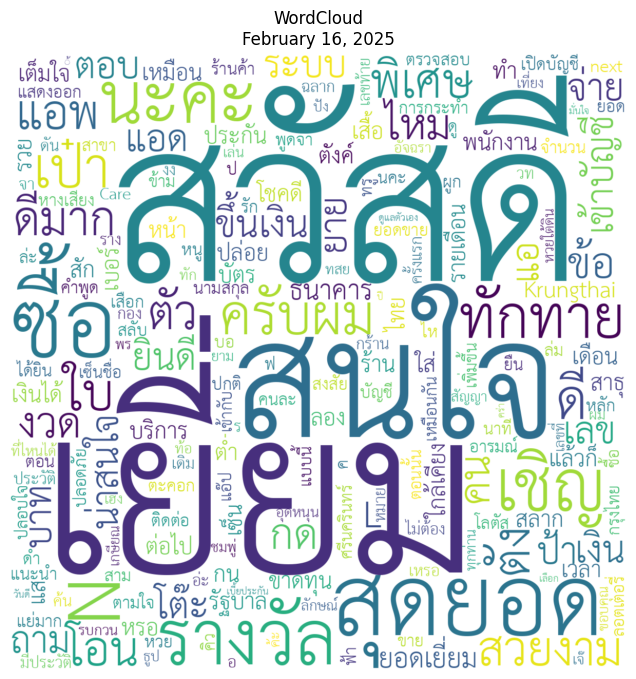

In [29]:
from_date = datetime.datetime(2025, 2, 16)
within_date = datetime.datetime(2025, 2, 17)

title = f'WordCloud\n{from_date.strftime('%B %d, %Y')}'

sentences = comment_df.filter((pl.col('source_type') == ('post')) & (pl.col('timestamp') >= from_date) & (pl.col('timestamp') < within_date)).get_column('text')
combined_sentence = ' '.join(sentences)

wordcloud.plot_wordcloud(combined_sentence, background_color='white', font_path='fonts/THSarabunNew.ttf', language='th', keep_stopwords=False, figsize=(8, 8), width=1200, height=1200, title=title)

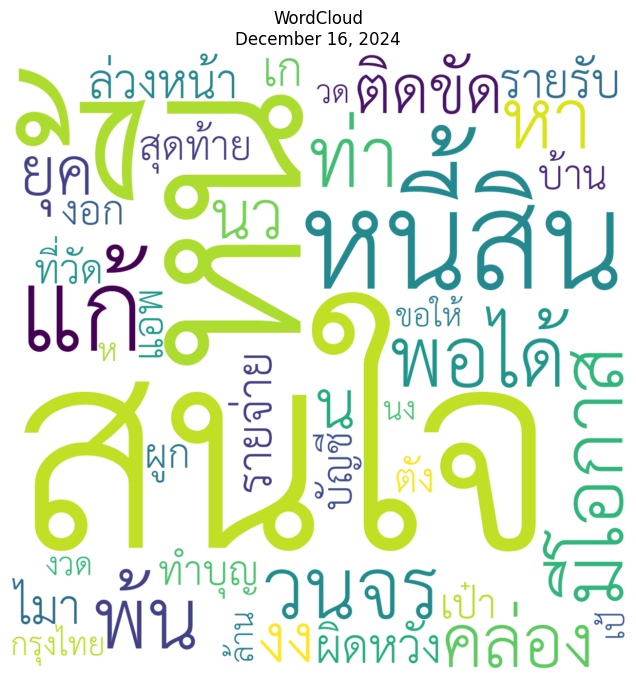

In [30]:
from_date = datetime.datetime(2024, 12, 16)
within_date = datetime.datetime(2024, 12, 17)

title = f'WordCloud\n{from_date.strftime('%B %d, %Y')}'

sentences = comment_df.filter((pl.col('source_type') == ('post')) & (pl.col('timestamp') >= from_date) & (pl.col('timestamp') < within_date)).get_column('text')
combined_sentence = ' '.join(sentences)

wordcloud.plot_wordcloud(combined_sentence, background_color='white', font_path='fonts/THSarabunNew.ttf', language='th', keep_stopwords=False, figsize=(8, 8), width=1200, height=1200, title=title)

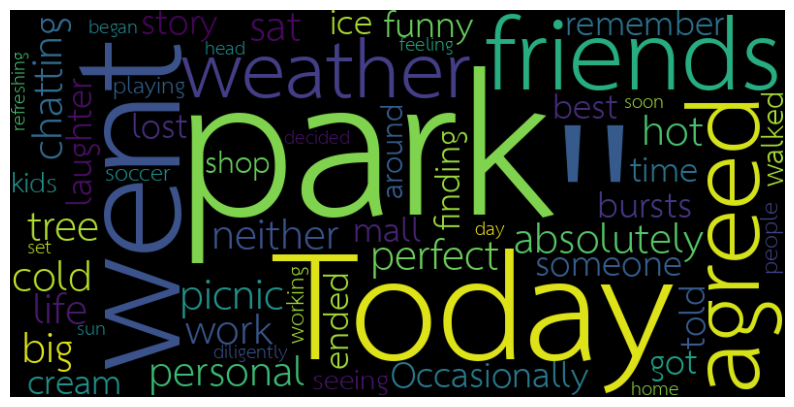

In [31]:
en_sentence = 'Today, I went to the park with my friends, and we all agreed that "the weather was absolutely perfect for a picnic" because it was neither too hot nor too cold. We sat under a big tree, chatting about work and personal life. Occasionally, there were bursts of laughter as someone told a funny story, like "remember that time when we got lost in the mall and ended up finding the best ice cream shop?" After that, we walked around the park, seeing kids playing soccer and people working out diligently. As the sun began to set, we decided to head home, feeling that "this was such a refreshing day, we should do this again soon!"'
wordcloud.plot_wordcloud(en_sentence, font_path='fonts/THSarabunNew.ttf', language='en', keep_stopwords=True)

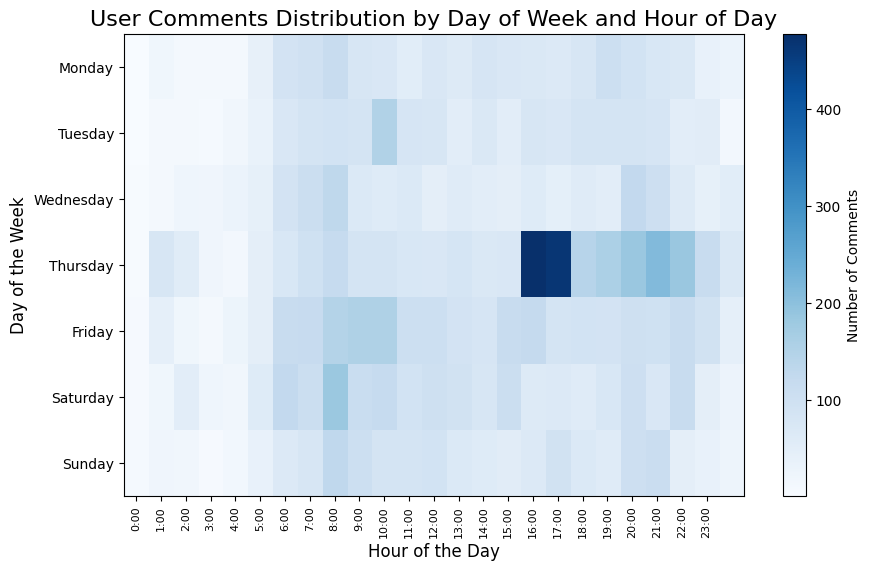

In [32]:
import matplotlib.pyplot as plt
import polars as pl

# Assuming 'comment_df' is a Polars DataFrame

# Convert timestamp to datetime format (if necessary)
#comment_df = comment_df.with_columns(pl.col('timestamp').cast(pl.Datetime))

# Extract the day of the week (0=Monday, 6=Sunday) and hour of the day
plot_df = comment_df.with_columns(
    pl.col('timestamp').dt.weekday().alias('day_of_week'),
    pl.col('timestamp').dt.hour().alias('hour')
)

# Group by day of the week and hour, and count the number of comments
comment_counts = plot_df.group_by(['day_of_week', 'hour']).agg(pl.len().alias('total_comments'))
comment_counts = comment_counts.sort(['day_of_week', 'hour'], descending=False)

# Pivot the data to have days as rows and hours as columns
pivoted = comment_counts.pivot(values='total_comments', on='hour', index='day_of_week')

# Plotting
plt.figure(figsize=(10, 6))

# Create the heatmap plot
plt.imshow(pivoted.to_numpy(), cmap='Blues', interpolation='nearest', aspect='auto')

# Set the x-ticks to represent the hours and y-ticks to represent the days of the week
plt.xticks(range(24), [f"{i}:00" for i in range(24)], rotation=90, fontsize=8)
plt.yticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Title and labels
plt.title('User Comments Distribution by Day of Week and Hour of Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)

# Add color bar for the heatmap
plt.colorbar(label='Number of Comments')

# Show plot
plt.show()


## Generate heat-map of keywords over time

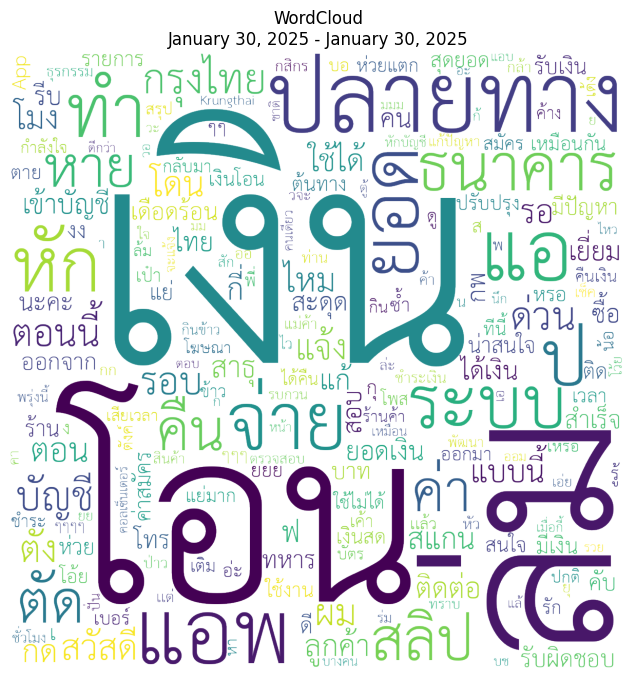

In [33]:
from_date = datetime.datetime(2025, 1, 30)
within_date = datetime.datetime(2025, 1, 31)

title = f'WordCloud\n{from_date.strftime('%B %d, %Y')} - {(within_date - datetime.timedelta(days=1)).strftime('%B %d, %Y')}'

sentences = comment_df.filter((pl.col('source_type') == ('post')) & (pl.col('timestamp') >= from_date) & (pl.col('timestamp') < within_date)).get_column('text')
combined_sentence = ' '.join(sentences)

wc = wordcloud.plot_wordcloud(combined_sentence, font_path='fonts/THSarabunNew.ttf', language='th', colormap='viridis', keep_stopwords=False, figsize=(8, 8), width=1200, height=1200, title=title, save_path=f'{title}.png', background_color='rgba(255, 255, 255, 0)')

In [34]:
# Get top n frequency words
list(wc.words_)[:5]

['เงิน', 'โอน', 'ล่ม', 'ปลายทาง', 'แอพ']

In [35]:
def plot_keyword_heatmap(timestamps, comments, target_keywords, fontpath=None, figsize=(10, 6), cmap='YlGnBu', time_tick='hour', hide_minute_text=False, title=None, axis_fontsize=12):
    """
    Plot a heatmap showing the frequency of target keywords in comments at different times of day.
    
    Parameters:
    - timestamps: List of datetime objects representing when each comment was made.
    - comments: List of comment text data.
    - target_keywords: List of target keywords to track.
    - fontpath: Optional path to a custom font for labels (if None, default font is used).
    - figsize: Tuple specifying the size of the figure (default is (10, 6)).
    - cmap: String specifying the color map to use for the heatmap (default is 'YlGnBu').
    - time_tick: Option for time granularity: 'hour' for hourly intervals or 'hour_minute' for 10-minute intervals (default is 'hour').
    - hide_minute_text: Boolean to hide minute text (default is False).
    - title: Optional title for the heatmap.
    - axis_fontsize: Font size for axis labels and title.
    """
    # Extract the hour and minute from each timestamp (assuming timestamp is in datetime format)
    if time_tick == 'hour':
        time_values = [timestamp.hour for timestamp in timestamps]  # Extract hour from timestamp
        time_labels = [str(i) for i in range(10, 25)]  # Labels for hours 10-24
        ticks = 15  # 15 time intervals (for each hour from 10 to 24)
    elif time_tick == 'hour_minute':
        time_values = [timestamp.hour * 60 + timestamp.minute for timestamp in timestamps]  # Extract hour and minute
        time_labels = []
        for h in range(10, 25):
            for m in range(0, 60, 10):
                if m == 0:
                    time_labels.append(f'{h}:00')  # Show full hour for 00 minute
                else:
                    time_labels.append('' if hide_minute_text else f':{m:02}')  # Show only minute for other values
        ticks = len(time_labels)  # Calculate the number of 10-minute intervals from 10:00 to 24:00

    # Initialize a dictionary to store counts of keywords per time
    keyword_counts = {keyword: np.zeros(ticks) for keyword in target_keywords}

    # Count occurrences of each keyword for each time interval
    for idx, text in enumerate(comments):
        time_value = time_values[idx]
        
        # Check for keyword presence in text
        for keyword in target_keywords:
            if keyword in text:
                if time_tick == 'hour':
                    keyword_counts[keyword][time_value - 10] += 1  # Adjusting hour to start from 10
                elif time_tick == 'hour_minute':
                    time_index = (time_value - 10 * 60) // 10  # Calculate index for 10-minute intervals
                    keyword_counts[keyword][time_index] += 1

    # Create the heatmap matrix
    heatmap_data = np.array([keyword_counts[keyword] for keyword in target_keywords])

    # Plotting
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(heatmap_data, aspect='auto', cmap=cmap, interpolation='nearest')
    
    ax.set_xticks(np.arange(ticks))
    ax.set_xticklabels(time_labels, rotation=90)

    ax.set_yticks(np.arange(len(target_keywords)))
    ax.set_yticklabels(target_keywords)
    
    ax.set_xlabel('Time of Day', fontsize=axis_fontsize)
    ax.set_ylabel('Target Keywords', fontsize=axis_fontsize)
    
    
    if title:
        ax.set_title(title, fontsize=axis_fontsize)
    else:
        ax.set_title(f'Heatmap of Keyword Occurrences in Comments by {time_tick.capitalize()}', fontsize=axis_fontsize)

    # Apply custom font if provided
    if fontpath:
        labelpad = 20
        prop = font_manager.FontProperties(fname=fontpath, size=axis_fontsize)
        ax.set_xlabel('Time of Day', fontproperties=prop, fontsize=axis_fontsize, labelpad=labelpad)
        ax.set_ylabel('Target Keywords', fontproperties=prop, fontsize=axis_fontsize, labelpad=labelpad)
        if title:
            ax.set_title(title, fontproperties=prop, fontsize=axis_fontsize, pad=30)
        else:
            ax.set_title(f'Heatmap of Keyword Occurrences in Comments by {time_tick.capitalize()}', fontproperties=prop, fontsize=axis_fontsize, pad=30)
        
        for tick in ax.get_xticklabels():
            tick.set_fontproperties(prop)
        for tick in ax.get_yticklabels():
            tick.set_fontproperties(prop)

    # Adjust the font properties for bold hour labels and smaller minute labels
    for tick in ax.get_xticklabels():
        if ':00' in tick.get_text():  # Check if it's an hour
            tick.set_fontweight('bold')  # Make the hour labels bold
            tick.set_fontsize(axis_fontsize - 2)
        else:
            tick.set_fontsize(axis_fontsize - 4)  # Make minute labels smaller

    cbar = fig.colorbar(cax, pad=0.02)
    cbar.set_label('Frequency', fontsize=axis_fontsize//2)
    cbar.ax.tick_params(labelsize=axis_fontsize//2)
    
    plt.tight_layout()
    plt.grid(color='darkgrey', alpha=0.1, linestyle='--')
    plt.show()

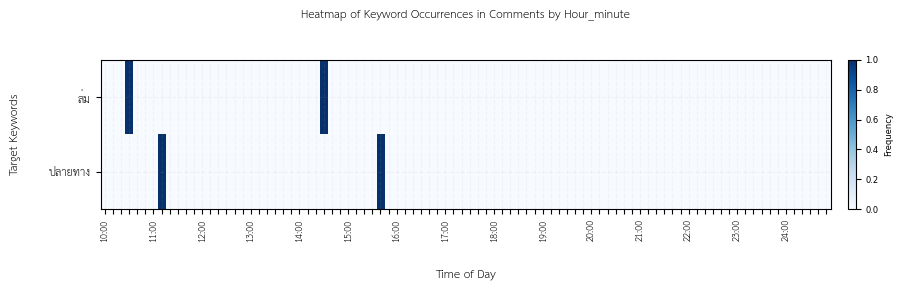

In [36]:
# Example usage:
timestamps = [  # List of datetime objects (replace with actual timestamps)
    datetime.datetime(2025, 2, 20, 10, 30), datetime.datetime(2025, 2, 20, 11, 15), datetime.datetime(2025, 2, 20, 12, 0),
    datetime.datetime(2025, 2, 20, 14, 30), datetime.datetime(2025, 2, 20, 15, 45), datetime.datetime(2025, 2, 20, 17, 0)
]
comments = [  # Corresponding list of comment text data
    "ข้อความที่มีคำว่า ล่ม", "ข้อความที่มีคำว่า ปลายทาง", "ไม่มีคำที่เราต้องการ", 
    "ข้อความที่มีคำว่า ล่ม", "ข้อความที่มีคำว่า ปลายทาง", "ข้อความที่ไม่มีคำที่ต้องการ"
]
target_keywords = ['ล่ม', 'ปลายทาง']  # Add more keywords here as needed

# Specify the path to your custom font file
fontpath = 'fonts/THSarabunNew.ttf'  # Replace with your actual font file path

plot_keyword_heatmap(timestamps, comments, target_keywords, fontpath, figsize=(10, 3), cmap='Blues', time_tick='hour_minute', hide_minute_text=True)

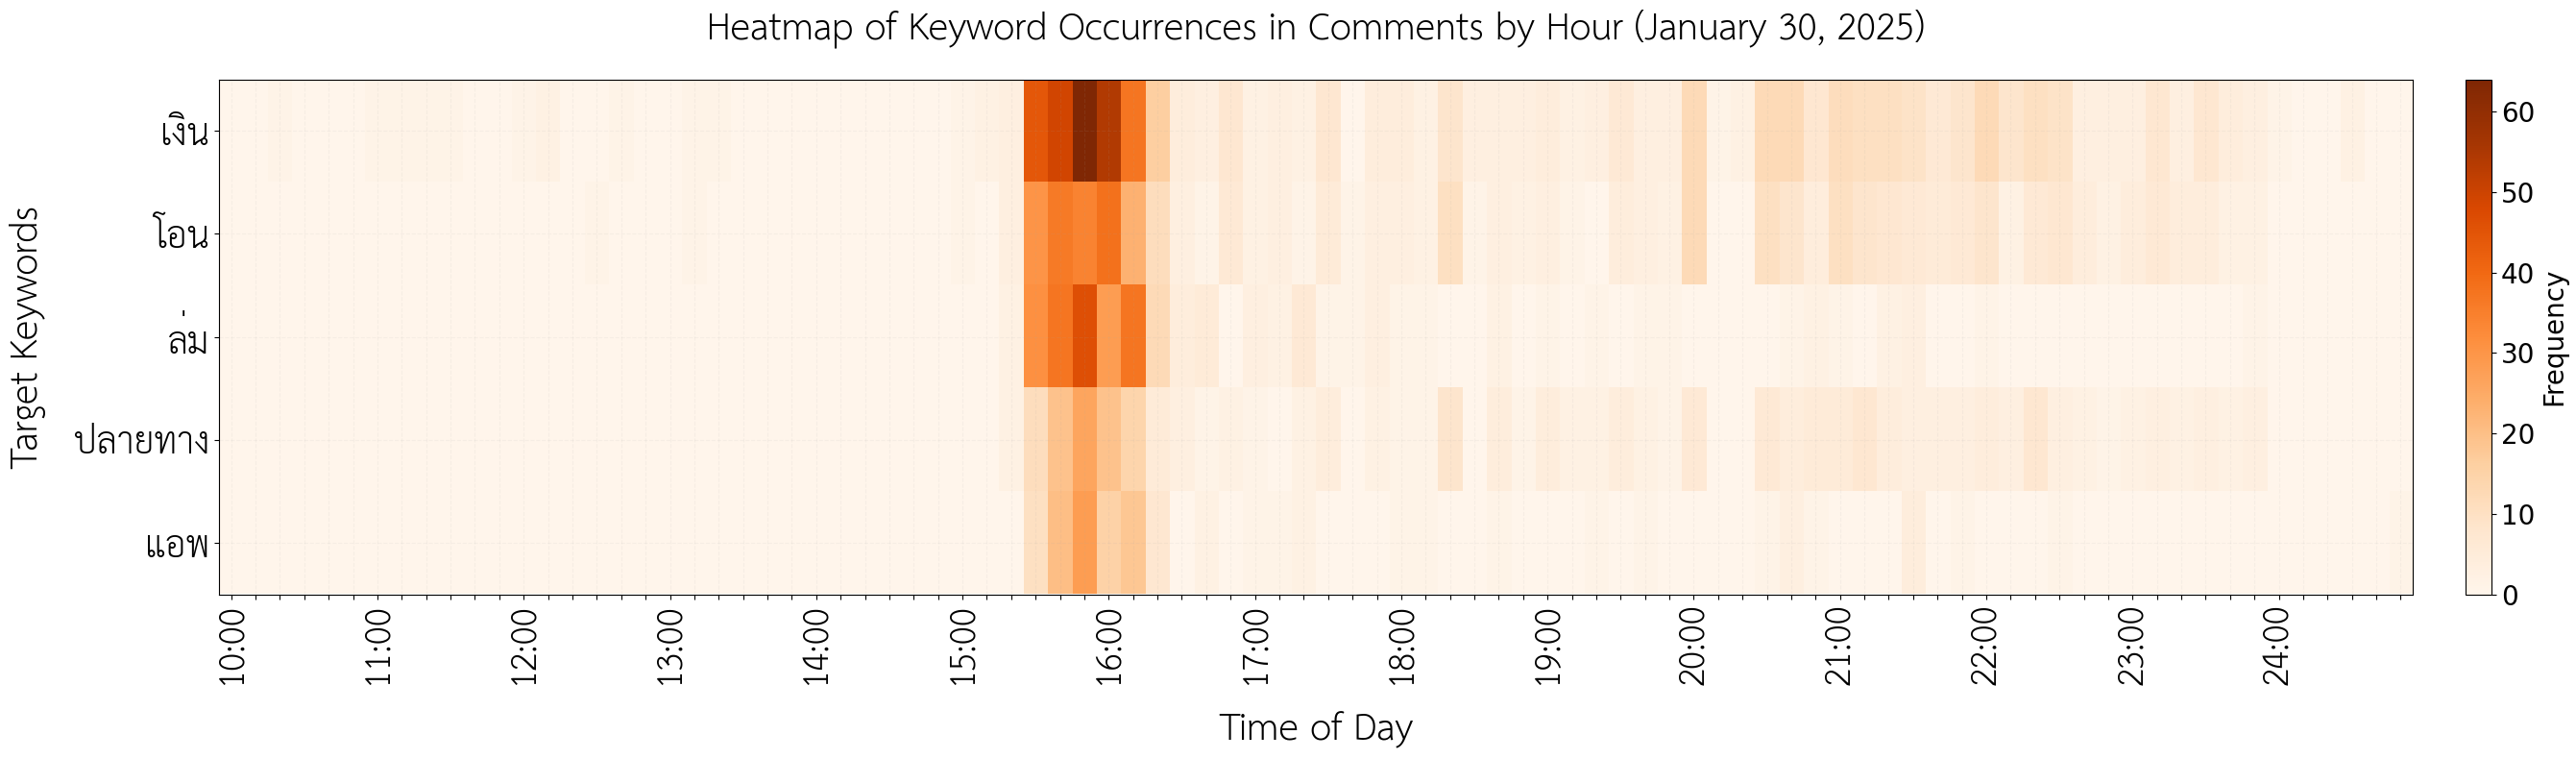

In [37]:
#target_post_id = 'post_d23aef401ffcc7d52abb376290f995db'

#df_plot = comment_df.filter(pl.col('source_id') == target_post_id)

from_date = datetime.datetime(2025, 1, 30)
within_date = datetime.datetime(2025, 1, 31)

df_plot = comment_df.filter((pl.col('timestamp') >= from_date) & (pl.col('timestamp') < within_date))

timestamps = df_plot.get_column('timestamp')
comments = df_plot.get_column('text')

# Get top n frequency words
target_keywords = list(wc.words_)[:5]

# Specify the path to your custom font file
fontpath = 'fonts/THSarabunNew.ttf'  # Replace with your actual font file path

title = 'Heatmap of Keyword Occurrences in Comments by Hour (January 30, 2025)'
plot_keyword_heatmap(timestamps, comments, target_keywords, fontpath, figsize=(30, 8), cmap='Oranges', time_tick='hour_minute', hide_minute_text=True, title=title, axis_fontsize=40)

## Example Text Visualization

In [264]:
B([
    B('💳 ❌', '<small>January 30, 2025  @15:53</small><br><div style="font-family: Arail; sans-serif; font-size: 20px;">แอพล่มค่ะเงินตัดปลายทางไม่เข้า</div>'),
    B('👧🏻 📝', '<small>January 30, 2025  @16:59</small><br><div style="font-family: Arail; sans-serif; font-size: 20px;">สแกนจ่ายค่าสอบพอดีเงินหักไปแล้วแต่ไม่มีสลิปให้ ต้องทำยังไงคะ</div>'),
    B('😤 💸', '<small>January 30, 2025  @20:04</small><br><div style="font-family: Arail; sans-serif; font-size: 20px;">แย่มากตัดยอดแล้วไม่ได้สลิป</div>'),
])


In [263]:
B([
    B('💲 🔄', '<small>January 30, 2025  @21:11</small><br><div style="font-family: Arail; sans-serif; font-size: 20px;">โอนเงินยังไม่เข้าปลายทางเลยค่ะ ขอเงินคืนด้วย</div>'),
    B('💰 😠', '<small>January 30, 2025  @22:21</small><br><div style="font-family: Arail; sans-serif; font-size: 20px;">ตั้งแต่ 4 โมงตังยังไม่เข้าบัญชีปลายทางเลย</div>'),
    B('💬 📤', '<small>January 30, 2025  @23:11</small><br><div style="font-family: Arail; sans-serif; font-size: 20px;">ตอนโอนบอกมีปัญหา สลิปไม่ขึ้นแต่มีแจ้งเตือนเงินออก อันนี้คือจ่ายบิลได้สำเร็จไหมครับ สงสัย</div>'),
])

## Digging in overshadowed topics

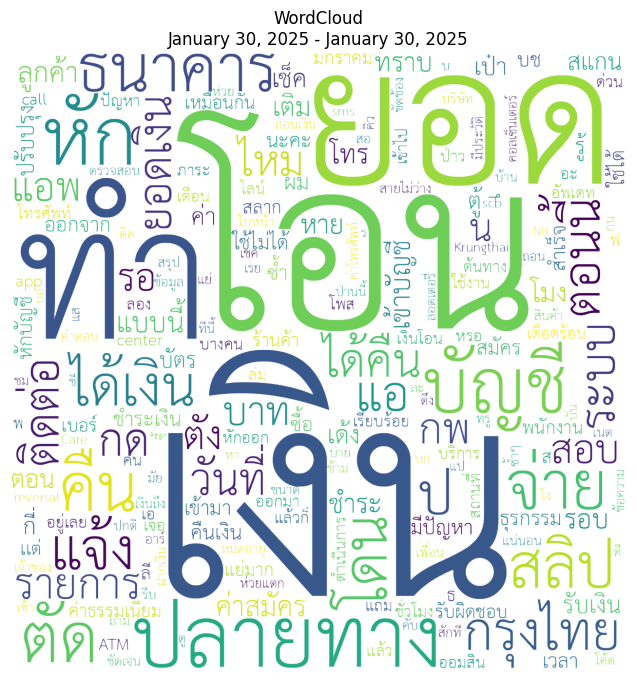

In [40]:
from_date = datetime.datetime(2025, 1, 30)
within_date = datetime.datetime(2025, 1, 31)

title = f'WordCloud\n{from_date.strftime('%B %d, %Y')} - {(within_date - datetime.timedelta(days=1)).strftime('%B %d, %Y')}'

sentences = comment_df.filter(pl.col('source_id') == 'post_2a3aad47107551e893ab55b3a2746630').get_column('text')
combined_sentence = ' '.join(sentences)

wc = wordcloud.plot_wordcloud(combined_sentence, font_path='fonts/THSarabunNew.ttf', language='th', colormap='viridis', keep_stopwords=False, figsize=(8, 8), width=1200, height=1200, title=title, save_path=f'{title}.png', background_color='rgba(255, 255, 255, 0)')

In [41]:
wc.words_

{'เงิน': 1.0,
 'โอน': 0.643312101910828,
 'ยอด': 0.4012738853503185,
 'ทำ': 0.36942675159235666,
 'ปลายทาง': 0.31210191082802546,
 'หัก': 0.2802547770700637,
 'บัญชี': 0.2484076433121019,
 'ตัด': 0.20382165605095542,
 'คืน': 0.1910828025477707,
 'จ่าย': 0.1910828025477707,
 'ธนาคาร': 0.18471337579617833,
 'สลิป': 0.16560509554140126,
 'โดน': 0.1592356687898089,
 'แจ้ง': 0.14012738853503184,
 'ป': 0.14012738853503184,
 'ได้เงิน': 0.1337579617834395,
 'กรุงไทย': 0.12738853503184713,
 'ตอนนี้': 0.12101910828025478,
 'ระบบ': 0.10828025477707007,
 'ติดต่อ': 0.10828025477707007,
 'แอ': 0.10828025477707007,
 'ได้คืน': 0.10191082802547771,
 'ยอดเงิน': 0.09554140127388536,
 'กด': 0.09554140127388536,
 'วันที่': 0.08917197452229299,
 'ไหม': 0.08280254777070063,
 'กพ': 0.08280254777070063,
 'รายการ': 0.08280254777070063,
 'บาท': 0.07006369426751592,
 'สอบ': 0.07006369426751592,
 'ตัง': 0.07006369426751592,
 'แอพ': 0.07006369426751592,
 'รอ': 0.06369426751592357,
 'น': 0.06369426751592357,
 'ค่าสม

In [274]:
def generate_html_list(text_list, font="Arial", fontsize=20, bullet='💬'):
    html = f"""<div style="text-align: left; font-family: '{font}', sans-serif; font-size: {fontsize}px;">
    <small>
        <ul style="list-style-type: none; margin: 0px; padding-top: 0px; padding-bottom: 0px; padding-right: 5px; padding-left: 20px;">
    """
    for text in text_list:
        html += f"<li>{bullet} {text}</li>\n"
    
    html += """</ul>
        </small>
        </div>"""
    return html

In [209]:
b1 = ['ลองโอนจาก scb ก็ไม่มียอดเข้ากรุงไทยเลย',
      'โดนหักเงินเกินกว่าจำนวนจริง เพราะมีการทำรายการซ้ำๆ หลายครั้ง โดนทั้งหมด 4 ครั้งและหักเงินแล้ว โดยโอนผ่านคิวอาร์โค้ดเข้าพร้อมเพย์เลขบัตรปชช.',
      ]

b2 = ['เติมเงินมือถือผ่านแอพเป๋าตังมีการหักยอดในบัญชีแล้วแต่ยอดเงินยังไม่เข้าไปที่เบอร์โทร',
      'จ่ายค่าสมัครสอบซำ้ รอบ 1 จ่ายทางเป๋าตัง หักจ่ายผ่าน g wallet รอบ 2 จ่ายทางเป๋าตัง หักจากธนาคารกรุงไทย จะได้คืนยามไหน?']

b3 = ['กดเงินทาง ATM ไม่ได้เงินต้องทำอย่างไร',
      'ถอนเงินตู้ ATM โดนค่าธรรมเนียมตัดไป 2 รอบ',
      'กดเงินผ่านตู้ ATM ไม่ได้รับเงินแต่โดนตัดออกจากบัญชีแถมโดนค่าธรรมเนียมการกดเงินถึง 3 ครั้ง',
      'ใช้บัตรกรุงไทยไปกดตังค์ที่ตู้ธนาคารกรุงเทพ เงินไม่ออกแต่แจ้งหักบัญชีพร้อมค่าธรรมเนียม']

b4 = ['โอนจ่ายบัตร ตั้งแต่วันที่ 30 จนวันนี้ยังไม่ตัดชำระให้เลยค่ะ',
      'จริงนี้ในรายการบัตรทราเวลขึ้นคืนเงินแต่เงินไม่คืน',
      'วันนี้วันที่ 3 เเล้ว ปลายทางบัตรเครดิตยังโทรตามยอดอยู่เลย ออกมาชี้เเจงหน่อย',
      'โทรไปเพื่อขอเลขอ้างอิงก็ให้มาแบบมั่วไปส่งๆ ทางปลายทางตรวจสอบไม่ได้ ส่งงวดรถไป แล้วเมื่อวานเป็นวันสุดท้ายของการส่งเดือนมกรา แล้วคือไม่มีเงินสำรองจ่าย เครียดเลยค่ะ']

b5 = ['กดซื้อสลากเงินออกแต่ไม่ได้สลากค่ะ',
      'ผมซื้อสลากโดนตัดเงิน แต่สลากไม่ได้ ผ่านมาเกิน 24 ชม แล้วจะได้อันไหนมั้ยครับ',
      'เมื่อวานโอนเงินไปซื้อลอตเตอรี่ใน app เป๋าตังค์เงินออกแต่ไม่ได้ลอตเตอรี่ต้องทำไงคะ']

b6 = ['ขายของ ลูกค้าโอนเงินมา แล้วโดนดึงเงินกลับ ต้องทำยังไง ขาดทุนนะคะ',
      'ลูกค้าโอนเงินเข้า แต่ข้อมูลไม่ขึ้นใน App ถุงเงิน เลยไปเช็คข้อมูลในบัญชีธนาคาร เห็นว่าเงินเข้าเรียบร้อย แต่ไม่กี่ชั่วโมง ธนาคารยกเลิกการโอน โดยไม่แจ้งเจ้าของบัญชี แบบนี้ทำได้ด้วยหรือ โทร Call center ก็ติดต่อไม่ได้ แจ้ง @CIS ก็ไม่เห็นทำอะไรเลย']

In [275]:
B([
    B('<small style="font-size: 30px">💲 Money Transfer</small>', generate_html_list(b1)),
    B('<small style="font-size: 30px">📱 Paotang Application</small>', generate_html_list(b2)),
    B('<small style="font-size: 30px">🎰 Digital Lottery</small>', generate_html_list(b5)),
])

In [276]:
B([
    B('<small style="font-size: 30px">🧾 Bill Payment</small>', generate_html_list(b4)),
    B('<small style="font-size: 30px">🏦 ATM</small>', generate_html_list(b3)),
    B('<small style="font-size: 30px">👤 Merchant</small>', generate_html_list(b6)),
])